**Import library need by the project**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

**Read data from CSV and display the summary**

In [4]:
wines = pd.read_csv('wine_data.csv', sep=',')

wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
5,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
6,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
7,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
8,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
9,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [5]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Observe the variable type. quality could be decrete variable and rest variable could be continuous **

In [6]:
for i, col in enumerate(list(wines.columns.values)):
    print("Column name: {}, type: {}".format(col, wines[col].dtype))

Column name: fixed_acidity, type: float64
Column name: volatile_acidity, type: float64
Column name: citric_acid, type: float64
Column name: residual_sugar, type: float64
Column name: chlorides, type: float64
Column name: free_sulfur_dioxide, type: float64
Column name: total_sulfur_dioxide, type: float64
Column name: density, type: float64
Column name: pH, type: float64
Column name: sulphates, type: float64
Column name: alcohol, type: float64
Column name: quality, type: int64


**We do not want to have empty data, so check if any column misses data**

In [7]:
wines.isnull().any().any()

np.False_

**Based on the histogram, quality is from 3 to 9 and we have 3000 records for each quality level**

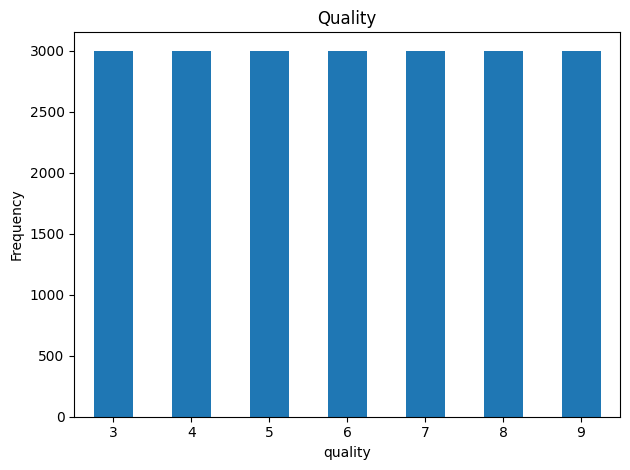

In [8]:
wines['quality'].value_counts().plot(kind='bar', title = 'Quality') 

plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Heatmap to help us to understand correlation. From here, we can understand alcohol is important for quality. The correlation between quality and pH is -0.0024 and some of variables have correlation less than 0.05. We can consider build model without those variable which are less than 0.05.**

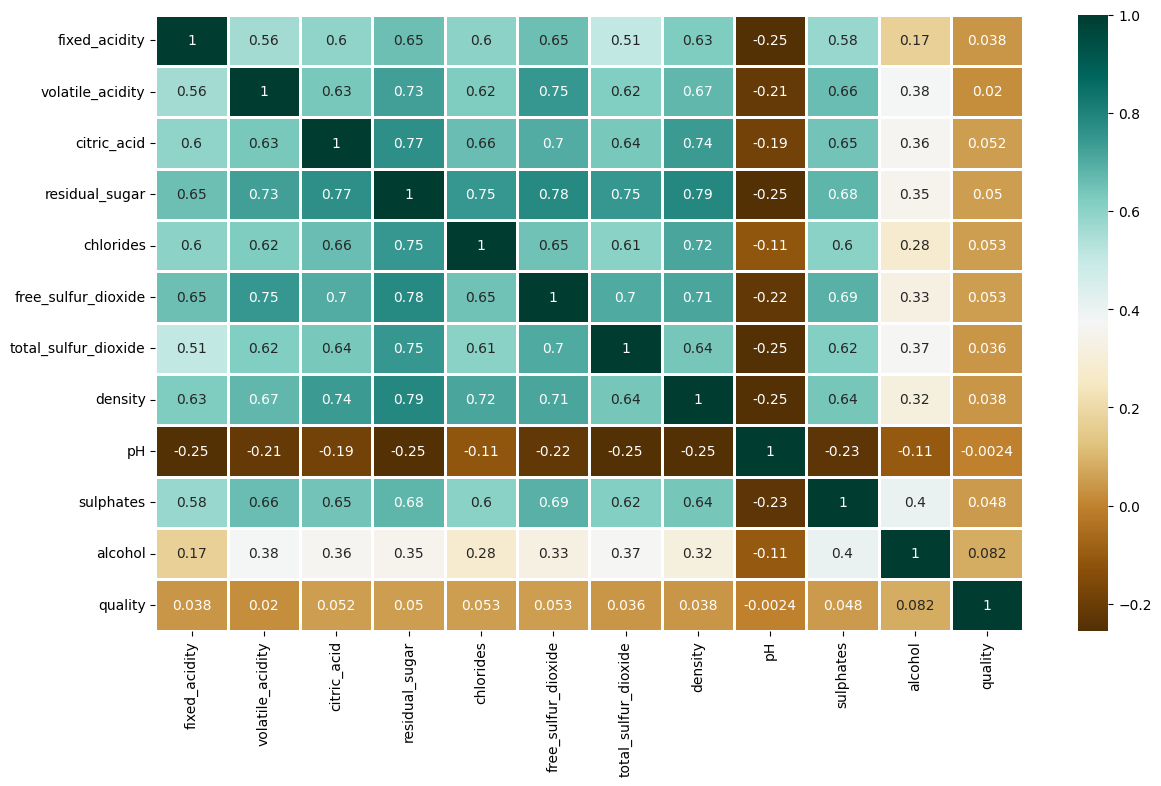

In [9]:
plt.figure(figsize=(14, 8))
sns.heatmap(wines.corr(), cmap = 'BrBG', linewidths = 2, annot = True)
plt.show()

**We want to observe features if any one is much skewed since skewness could affect model prediction**

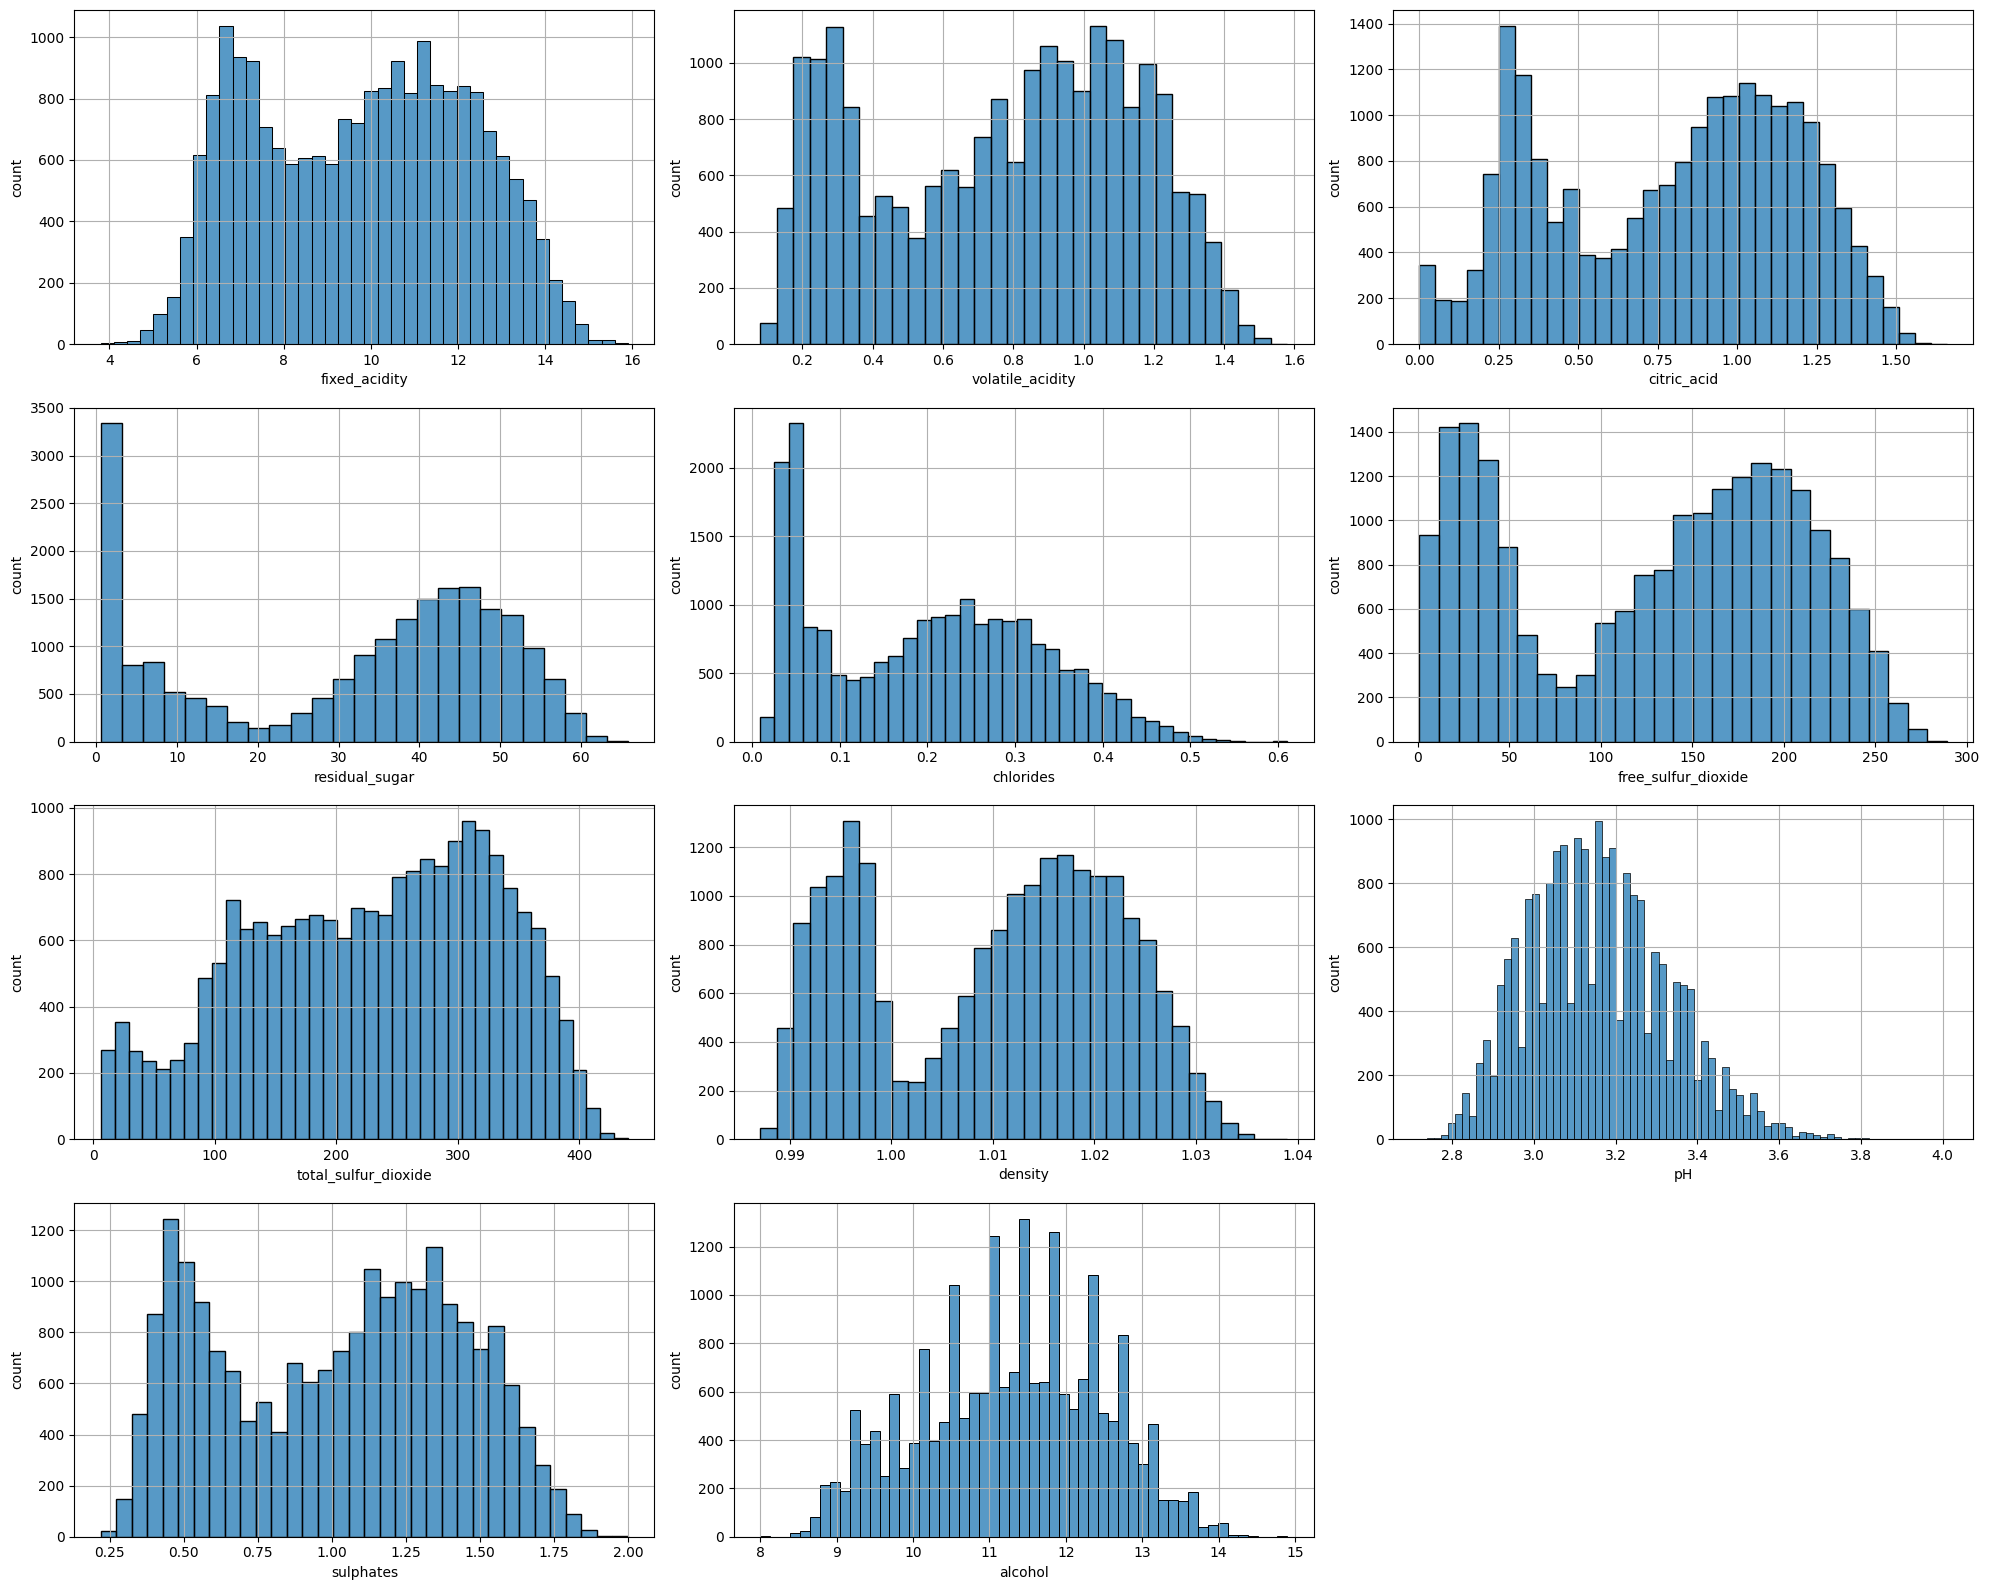

In [10]:
features = wines.drop(columns=['quality'], errors='ignore')

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = features[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid()
    plt.tight_layout()

plt.show()

**KDE to show the probability curve so we can observe the distribution of each feature**

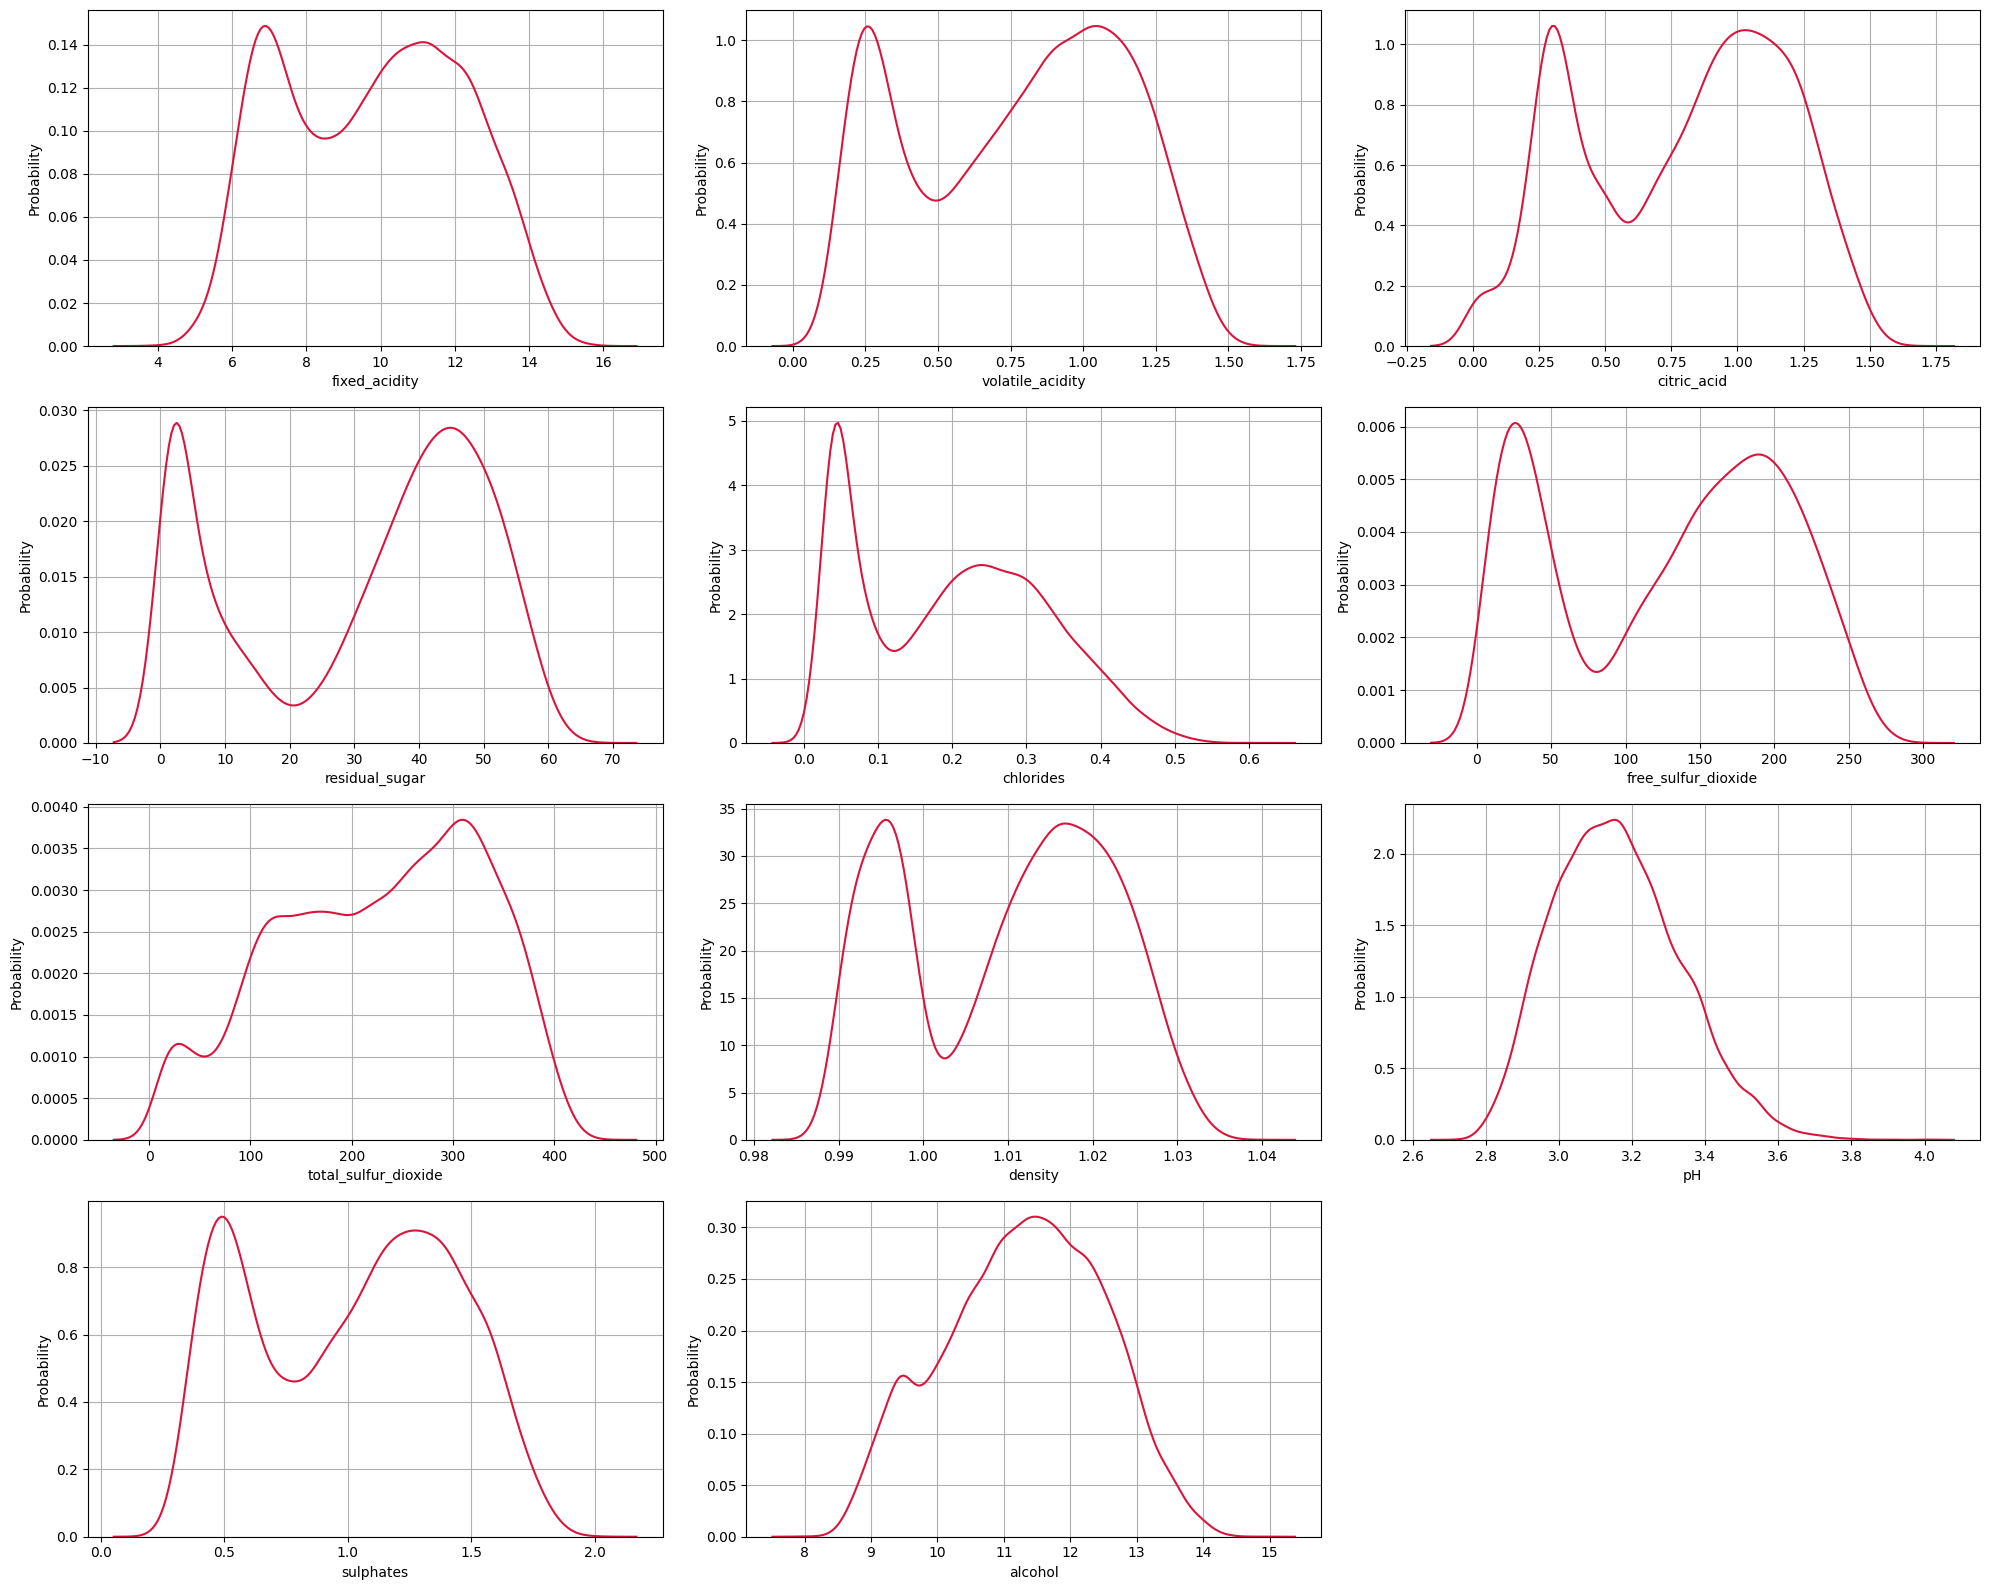

In [11]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = features[col], color = 'crimson')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid()
    plt.tight_layout()

plt.show()

**We use scatterplot to find if there has outliers that we need to remove**

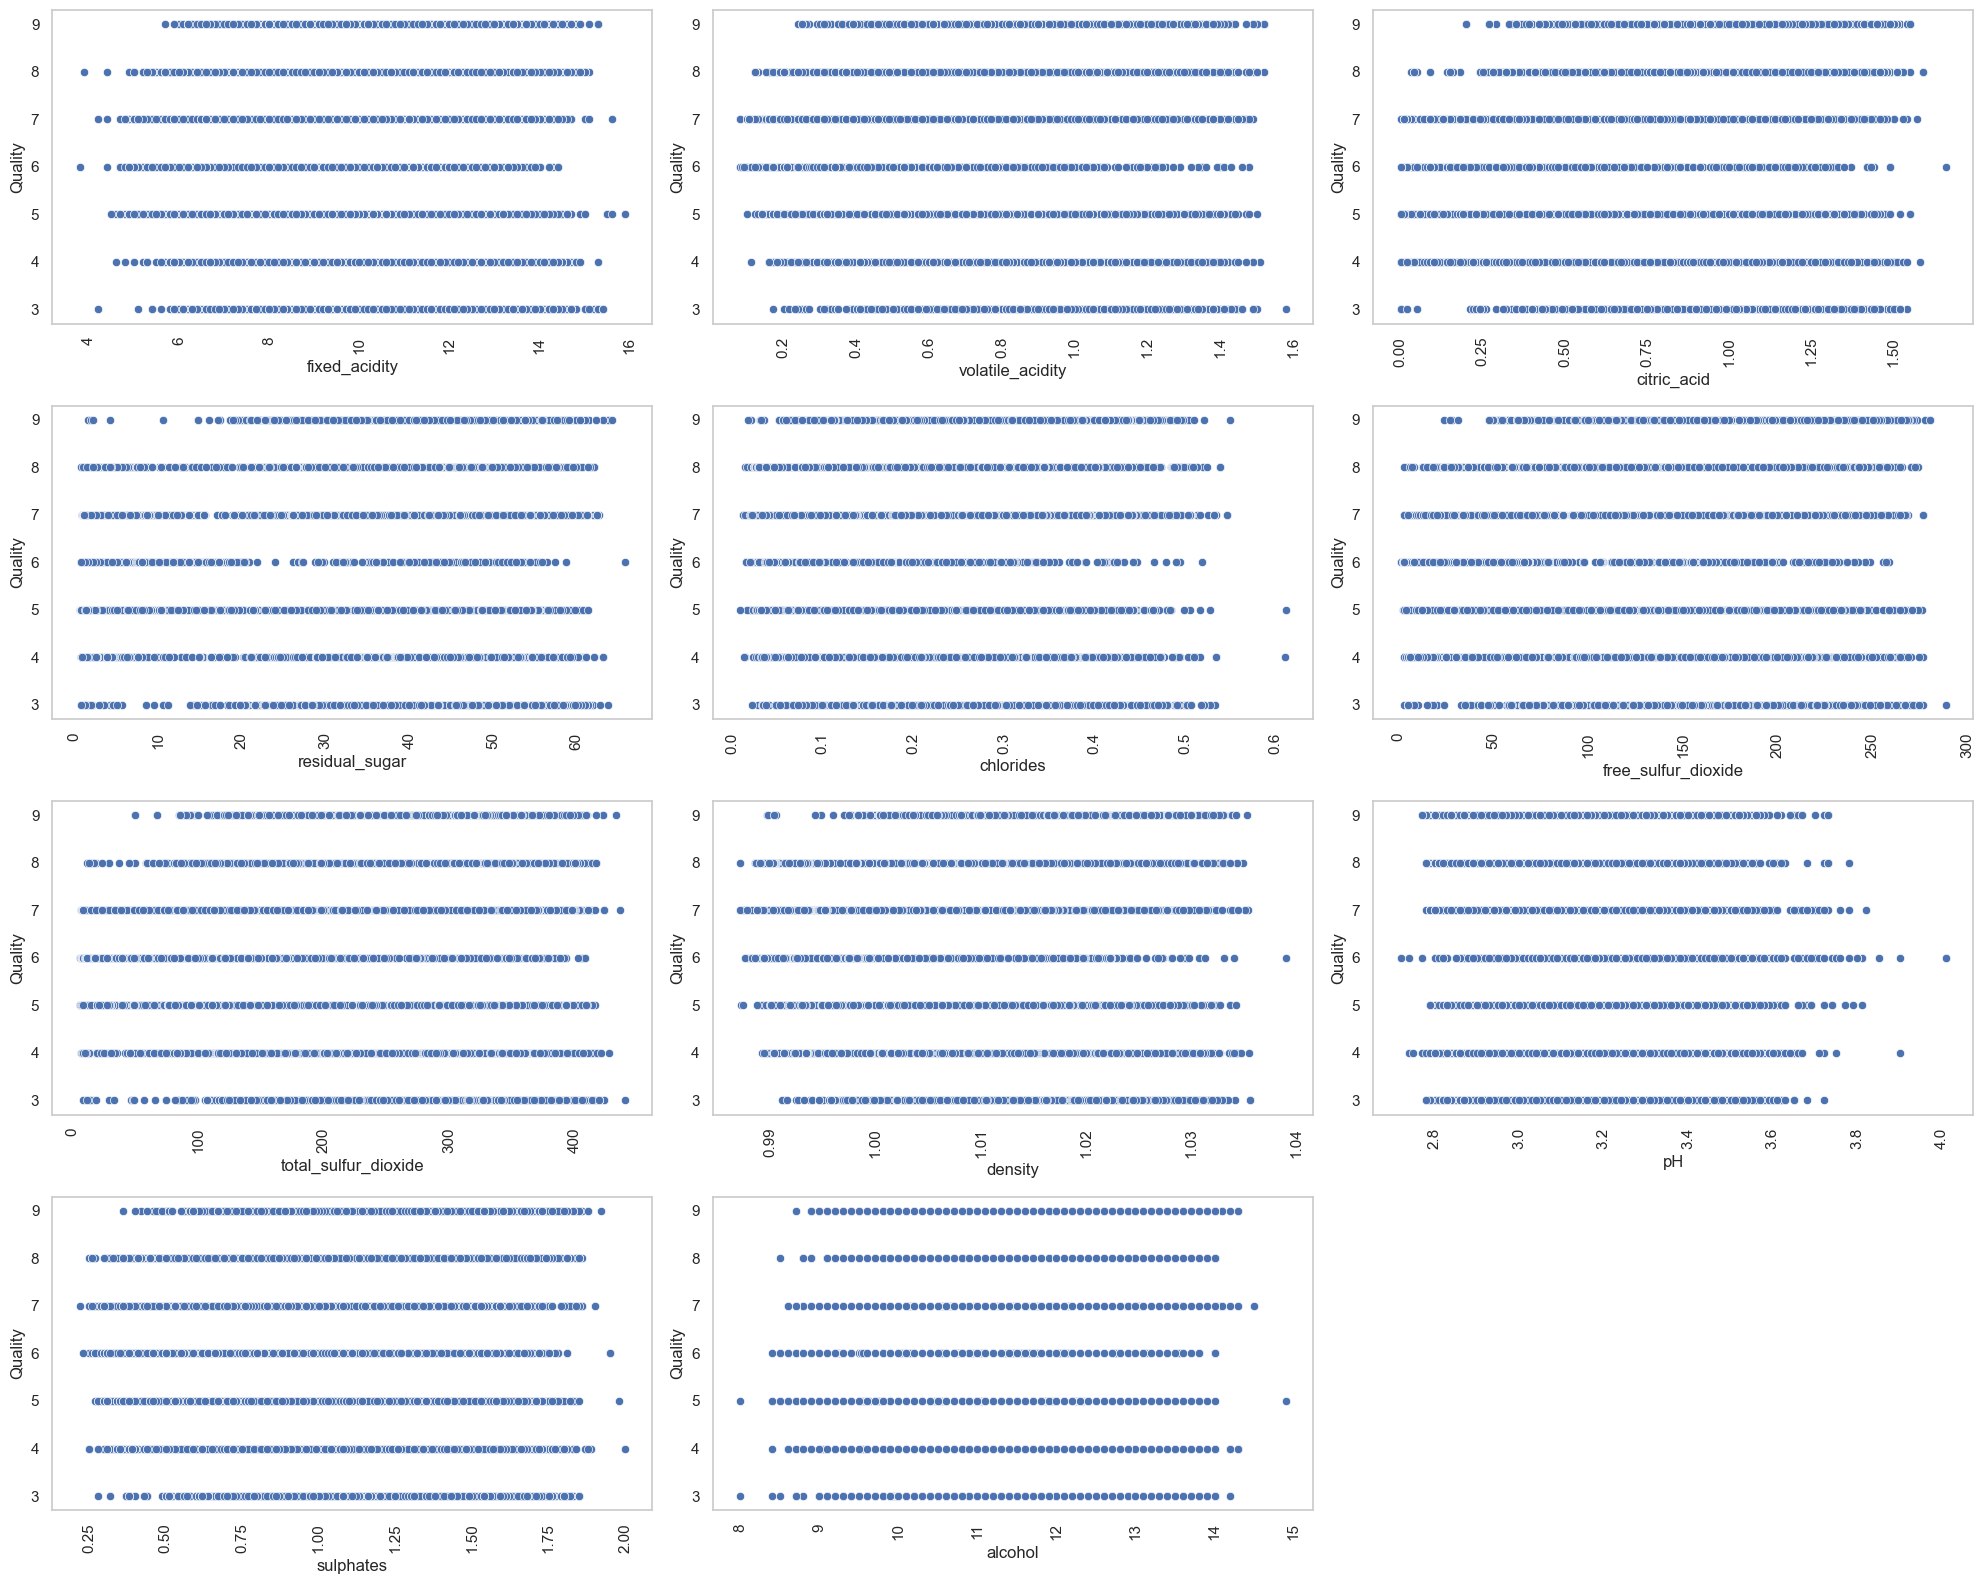

In [12]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()

**Create smaller dataset for comparison. We only keep the variables have more than 0.04 correlation with quality**

In [13]:
wines_small = wines.drop(['fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'density', 'pH'], axis = 1)
wines_small.head()

,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,sulphates,alcohol,quality
0,0.66,2.20,0.074,10.0,0.57,9.0,3
1,0.49,2.10,0.200,5.0,0.63,8.4,3
2,0.00,4.25,0.097,5.0,0.54,10.7,3
3,0.42,1.50,0.145,34.0,0.86,9.9,3
4,0.02,3.40,0.084,6.0,0.49,11.0,3


**Shuffle data and split dataset to independent data and target data**

In [19]:
wines = wines.sample(frac=1).reset_index(drop=True)
x = wines.drop(['quality'], axis = 1)
y = wines.filter(['quality'], axis = 1)
print(x.head())
print()
print(y.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           12.3              1.14         1.27            23.8      0.143   
1           14.2              0.46         1.09            52.9      0.236   
2           13.7              0.82         1.01            42.8      0.290   
3           13.5              1.01         0.85            53.0      0.252   
4            7.0              0.16         0.32             8.3      0.045   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                217.7                 372.6  1.01455  3.05       1.62   
1                167.7                 254.0  1.02172  3.21       0.98   
2                242.5                 210.1  1.02039  3.02       1.07   
3                224.7                 311.7  1.02026  2.97       0.92   
4                 38.0                 126.0  0.99580  3.21       0.34   

   alcohol  
0     11.6  
1     10.5  
2     10.4  
3     10.4  
4      9.2  

   qual

In [21]:
wines_small = wines_small.sample(frac=1).reset_index(drop=True)
small_x = wines_small.drop(['quality'], axis = 1)
small_y = wines_small.filter(['quality'], axis = 1)

print(small_x.head())
print()
print(small_y.head())

   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  sulphates  \
0         0.88            35.1      0.113                250.2       1.56   
1         0.66             3.0      0.093                 12.0       0.63   
2         0.40             6.3      0.050                  3.0       0.56   
3         0.47             2.4      0.074                  7.0       0.46   
4         1.14            55.2      0.206                208.3       1.40   

   alcohol  
0     10.6  
1     10.8  
2     12.0  
3      9.5  
4     11.5  

   quality
0        9
1        7
2        4
3        5
4        4


**Splitting the dataset into 80% training and 20% testing**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 42)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))


Shape of x_train: (16800, 11)
Shape of x_test: (4200, 11)
Shape of y_train: (16800, 1)
Shape of y_test: (4200, 1)


In [41]:
small_x_train, small_x_test, small_y_train, small_y_test = train_test_split(small_x, small_y, train_size = 0.8, test_size = 0.2, random_state = 42)

print("Shape of small_x_train: {}".format(small_x_train.shape))
print("Shape of small_x_test: {}".format(small_x_test.shape))
print("Shape of small_y_train: {}".format(small_y_train.shape))
print("Shape of small_y_test: {}".format(small_y_test.shape))

Shape of small_x_train: (16800, 6)
Shape of small_x_test: (4200, 6)
Shape of small_y_train: (16800, 1)
Shape of small_y_test: (4200, 1)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Adjust labels to start from 0
small_y = small_y - small_y.min()

# Split the data
small_x_train, small_x_test, small_y_train, small_y_test = train_test_split(small_x, small_y, train_size=0.8, test_size=0.2, random_state=0)

print("Shape of small_x_train: {}".format(small_x_train.shape))
print("Shape of small_x_test: {}".format(small_x_test.shape))
print("Shape of small_y_train: {}".format(small_y_train.shape))
print("Shape of small_y_test: {}".format(small_y_test.shape))

# Standardize the data
scaler = StandardScaler()
small_x_train = scaler.fit_transform(small_x_train)
small_x_test = scaler.transform(small_x_test)

# Convert target variables to NumPy arrays
small_y_train_np = small_y_train.to_numpy().ravel()
small_y_test_np = small_y_test.to_numpy().ravel()

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(small_x_train, small_y_train_np)
log_reg_pred = log_reg.predict(small_x_test)
log_reg_acc = accuracy_score(small_y_test_np, log_reg_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_acc * 100))

# Decision Tree
dec_tree = DecisionTreeClassifier(max_depth=10)
dec_tree.fit(small_x_train, small_y_train_np)
dec_tree_pred = dec_tree.predict(small_x_test)
dec_tree_acc = accuracy_score(small_y_test_np, dec_tree_pred)
print("Decision Tree Accuracy: {:.2f}%".format(dec_tree_acc * 100))

# Random Forest
rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
rand_forest.fit(small_x_train, small_y_train_np)
rand_forest_pred = rand_forest.predict(small_x_test)
rand_forest_acc = accuracy_score(small_y_test_np, rand_forest_pred)
print("Random Forest Accuracy: {:.2f}%".format(rand_forest_acc * 100))

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=10)
xgb_model.fit(small_x_train, small_y_train_np)
xgb_pred = xgb_model.predict(small_x_test)
xgb_acc = accuracy_score(small_y_test_np, xgb_pred)
print("XGBoost Accuracy: {:.2f}%".format(xgb_acc * 100))

# Feedforward Neural Network Model
# Convert DataFrames to NumPy arrays
small_x_train_np = small_x_train
small_x_test_np = small_x_test

small_y_train_cnn = to_categorical(small_y_train_np)
small_y_test_cnn = to_categorical(small_y_test_np)

ffnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(small_x_train_np.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(small_y_train_cnn.shape[1], activation='softmax')
])

ffnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ffnn_model.fit(small_x_train_np, small_y_train_cnn, epochs=100, batch_size=32, validation_data=(small_x_test_np, small_y_test_cnn))

ffnn_loss, ffnn_acc = ffnn_model.evaluate(small_x_test_np, small_y_test_cnn)
print("Feedforward Neural Network Accuracy: {:.2f}%".format(ffnn_acc * 100))

Shape of small_x_train: (16800, 6)
Shape of small_x_test: (4200, 6)
Shape of small_y_train: (16800, 1)
Shape of small_y_test: (4200, 1)
Logistic Regression Accuracy: 28.57%
Decision Tree Accuracy: 33.86%
Random Forest Accuracy: 43.19%
XGBoost Accuracy: 60.60%
Epoch 1/100


/Users/santoshkumar/development/envs/aai-501/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.2629 - loss: 1.7153 - val_accuracy: 0.3079 - val_loss: 1.5793
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.2786 - loss: 1.6241 - val_accuracy: 0.2971 - val_loss: 1.5778
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.2859 - loss: 1.6181 - val_accuracy: 0.3069 - val_loss: 1.5693
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.2839 - loss: 1.6095 - val_accuracy: 0.3126 - val_loss: 1.5704
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.2942 - loss: 1.6049 - val_accuracy: 0.3060 - val_loss: 1.5671
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.2904 - loss: 1.6006 - val_accuracy: 0.3076 - val_loss: 1.5675
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.2951 - loss: 1.5973 - val_accuracy: 0.3098 - val_loss: 1.5638
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.3016 - loss: 1.5949 - val_